In [41]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# !pip install pyreadstat
# !pip install --upgrade pandas

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# 결측치 시각화
import missingno as msno

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/my_data.csv')
df

,x1,x2,x3,x4,x5
0,1.0,0.1,'1',2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,'3',2019-01-03,C
3,NaN,0.4,'4',2019-01-04,A
4,5.0,0.5,'5',2019-01-05,B
5,NaN,NaN,NaN,2019-01-16,C
6,7.0,0.7,'7',NaN,A
7,8.0,0.8,'8',2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [43]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

In [44]:
df.isna().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

In [45]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


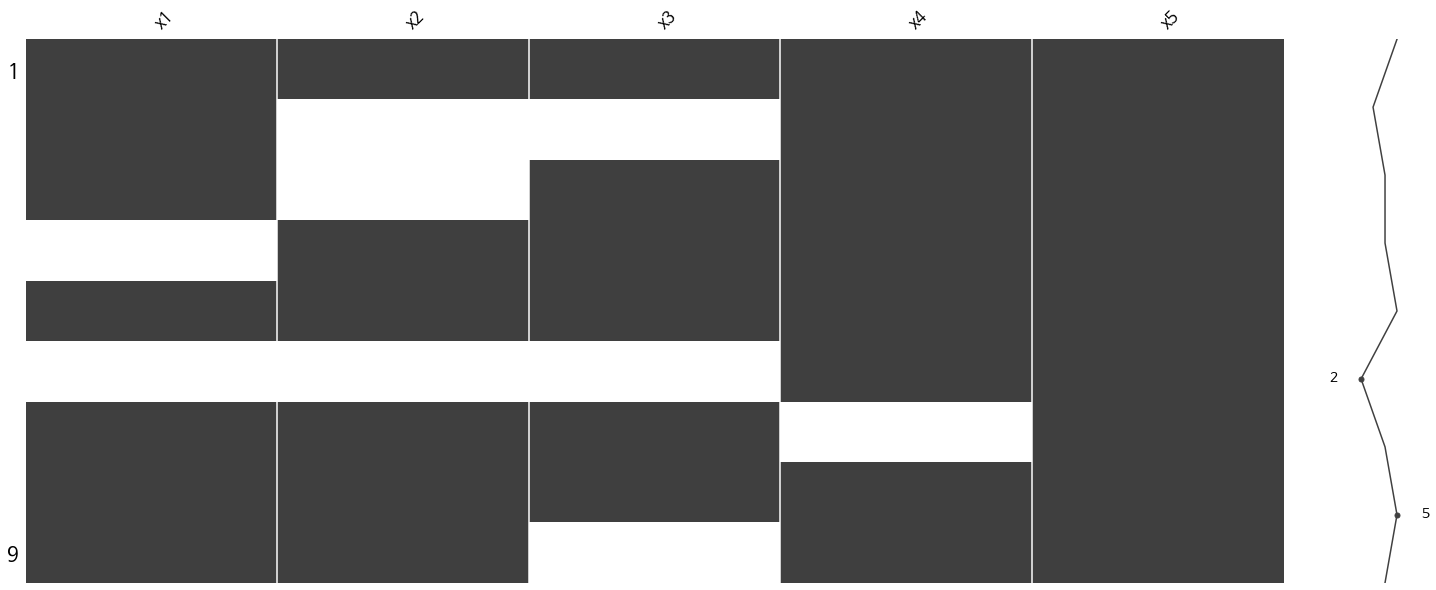

In [46]:
msno.matrix(df)

In [47]:
# 결측치가 있는 모든 행들 삭제
df.dropna(axis=0)

,x1,x2,x3,x4,x5
0,1.0,0.1,'1',2019-01-01,A
4,5.0,0.5,'5',2019-01-05,B
7,8.0,0.8,'8',2019-01-08,B


In [48]:
# 결측치가 있는 모든 컬럼 삭제
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [49]:
# 순수 데이터가 7개 미만인 컬럼 삭제
df.dropna(thresh=7,axis=1)

,x1,x4,x5
0,1.0,2019-01-01,A
1,2.0,2019-01-02,B
2,3.0,2019-01-03,C
3,NaN,2019-01-04,A
4,5.0,2019-01-05,B
5,NaN,2019-01-16,C
6,7.0,NaN,A
7,8.0,2019-01-08,B
8,9.0,2019-01-09,C


In [50]:
df

,x1,x2,x3,x4,x5
0,1.0,0.1,'1',2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,'3',2019-01-03,C
3,NaN,0.4,'4',2019-01-04,A
4,5.0,0.5,'5',2019-01-05,B
5,NaN,NaN,NaN,2019-01-16,C
6,7.0,0.7,'7',NaN,A
7,8.0,0.8,'8',2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


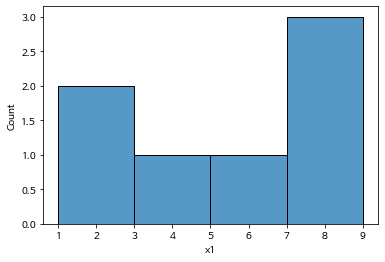

In [51]:
sns.histplot(data=df,x='x1')

## from sklearn.impute import SimpleImputer
### mean(평균), median(중앙값), most_frequent(최빈값), constant(특정 상수)

In [52]:
from sklearn.impute import SimpleImputer
imp_mean= SimpleImputer(strategy='mean')
imp_fre = SimpleImputer(strategy='most_frequent')
df_imp = pd.DataFrame(imp_fre.fit_transform(df),columns=df.columns)
df_imp

,x1,x2,x3,x4,x5
0,1.0,0.1,'1',2019-01-01,A
1,2.0,0.1,'1',2019-01-02,B
2,3.0,0.1,'3',2019-01-03,C
3,1.0,0.4,'4',2019-01-04,A
4,5.0,0.5,'5',2019-01-05,B
5,1.0,0.1,'1',2019-01-16,C
6,7.0,0.7,'7',2019-01-01,A
7,8.0,0.8,'8',2019-01-08,B
8,9.0,0.9,'1',2019-01-09,C


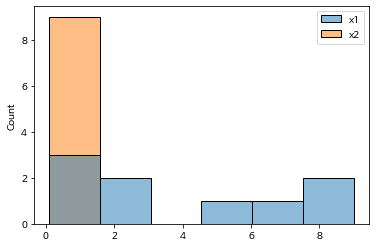

In [53]:
sns.histplot(df_imp)

## titan
### survived(생존여부) / pclass(승객 클래스) / sex(성별)
### age(나이) / sibsp(형제, 자매수) / parch(부모, 자녀수)
### fare(요금) / embarked(출발지 고유 이니셜) / class(선실 클래스)
### who(man, woman) / adult_male(성인 남자) / deck(선실 고유번호)
### embark_town(출발지) / alive(생존여부) / alone(가족없음)

In [54]:
tit = sns.load_dataset('titanic')
tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [55]:
tit.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

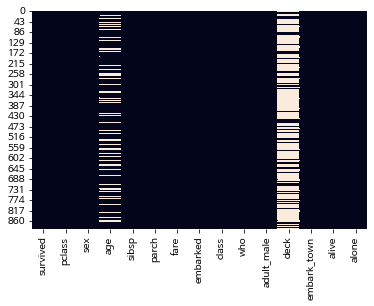

In [56]:
sns.heatmap(tit.isnull(),cbar=False)

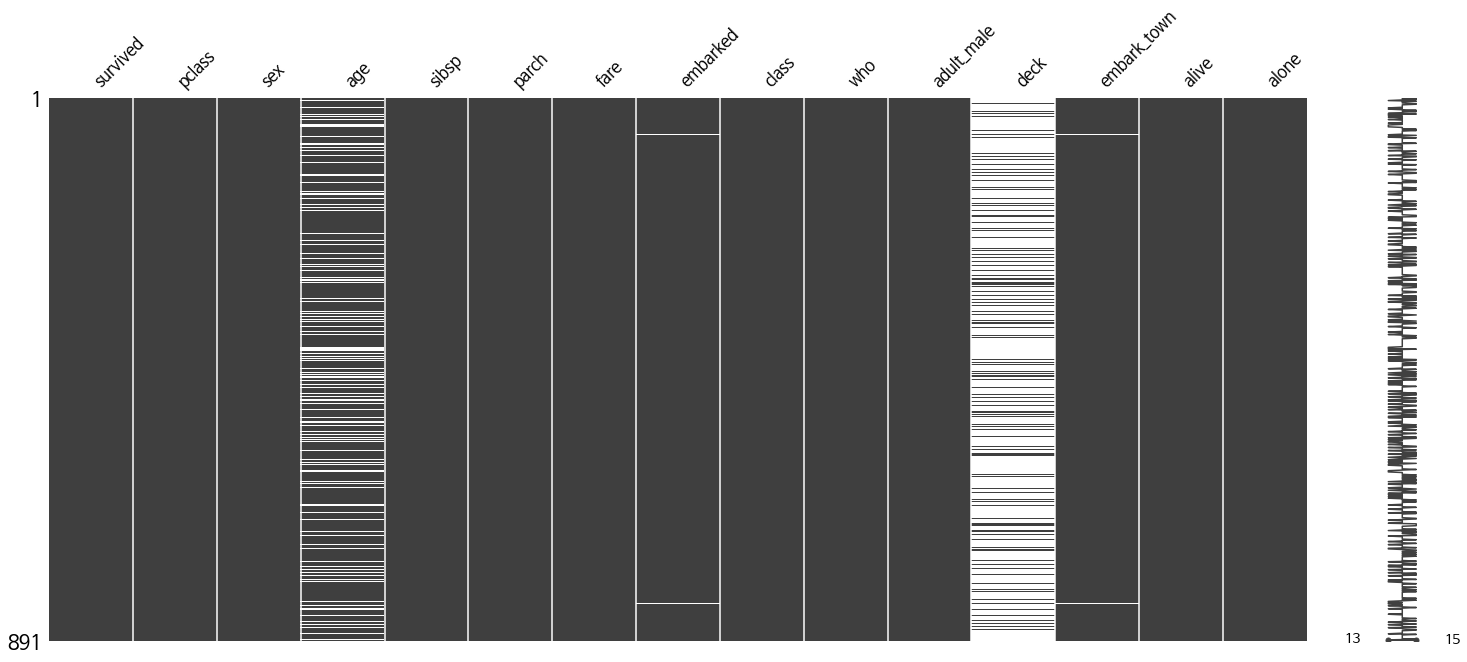

In [57]:
msno.matrix(tit)

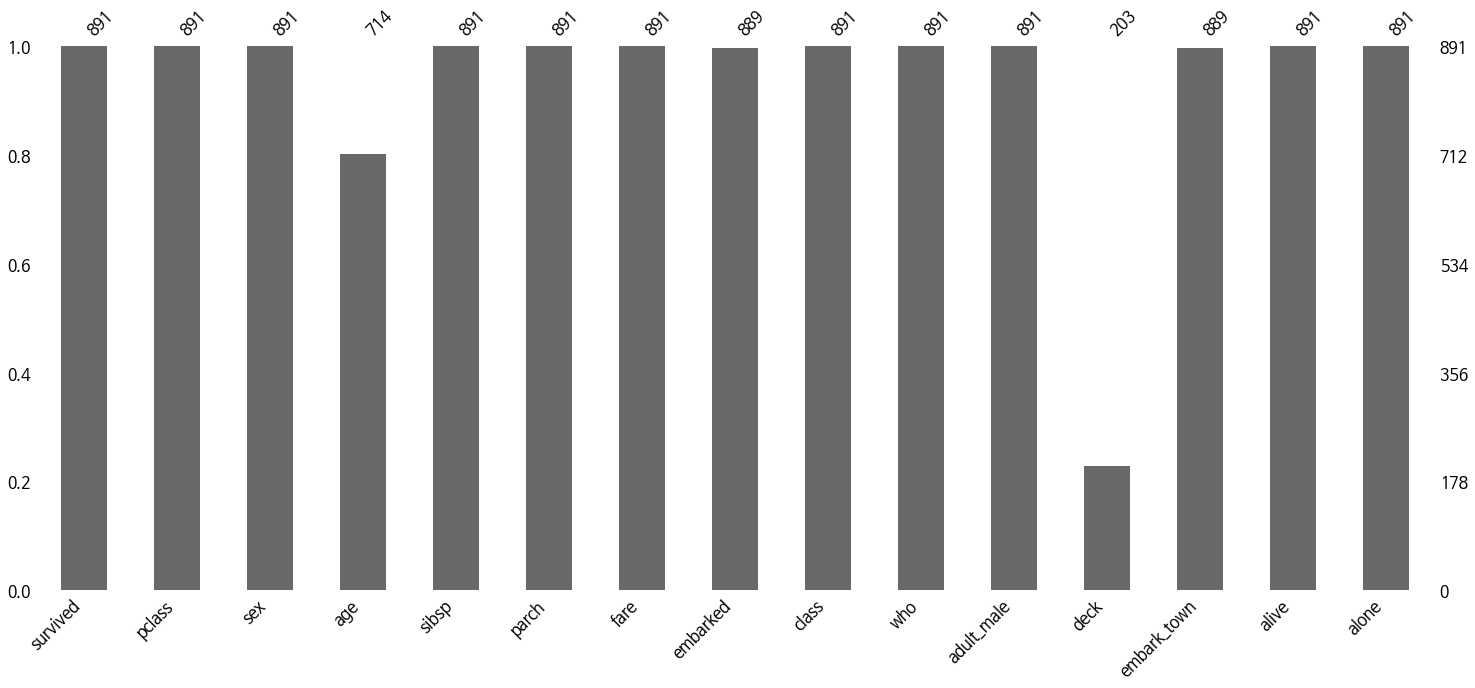

In [58]:
msno.bar(tit)

In [59]:
tit.drop('deck',axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [60]:
# 결측치가 50% 이상 컬럼 삭제
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

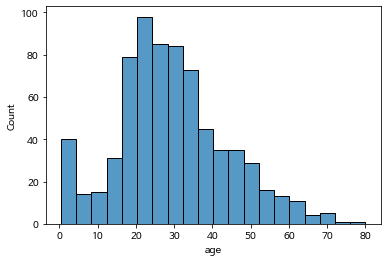

In [61]:
# 결측치 50% 이상 삭제
tit.dropna(thresh=int(len(tit)/2), axis=1)
sns.histplot(tit['age'])
tit['age'].describe()

In [62]:
tit.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 'age'의 결측치를 평균으로 채움

In [63]:
# imp_mean= SimpleImputer(strategy='mean')
# imp_fre = SimpleImputer(strategy='most_frequent')
# tit['age'] = imp_mean.fit_transform(tit[['age']])
# tit

In [64]:
tit.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [65]:
import numpy as np

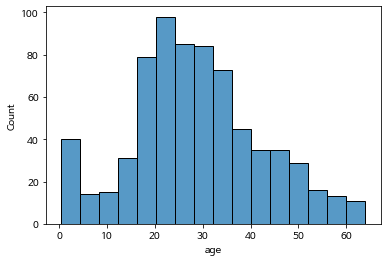

In [73]:
# iqr 결측치 제거
def iqr_outliers(data):
    q1, q3 = [20.125,38]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [i for i, x in enumerate(data) if x < lower_bound or x > upper_bound]
    return outliers

inx = iqr_outliers(tit['age'])
tit['age'] = tit['age'].drop(inx)
sns.histplot(tit['age'])

In [69]:
tit['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

## IRIS
### 1. iris 품종별 개수 보기
### 2. 품종으로 그룹을 만들고 petal_length에 대한 품종별 개수 구하기
### 3. 품종을 제외한 나머지 컬럼의 이름을 SL, SW, PL, PW, 품종으로 변경하고 새로운 dataFrame 생성
### 4. SL, SW 컬럼에서 10번째 ~ 20번째까지의 데이터 추출
### 5. 각 컬럼에 대해서 boxplot, histogram, scatter 를 사용하여 데이터분포 확인
### 6. 평균, 분산,사분위 값 구하기
### 7. 각 컬럼에서 랜덤하게 3개 이상의 결측치로 대체하기
### 8. 결측치를 숫자정보와 시각화로 확인
### 9. 결측치를 적절한 값으로 대체하기
### 10. 이상치가 있는지 확인하고 처리하기.

In [136]:
df_iris = sns.load_dataset('iris')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [137]:
#1. iris 품종별 개수 보기
df_iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [138]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#2. 품종으로 그룹을 만들고 petal_length에 대한 품종별 개수 구하기
df_iris.groupby(['species','petal_length']).agg(counts=('species','count'))
# df.dropna(subset=['급여']).groupby(['나이구간','성별'],as_index=False).agg(mean_income=('급여','mean'))

In [140]:
#3. 품종을 제외한 나머지 컬럼의 이름을 SL, SW, PL, PW, 품종으로 변경하고 새로운 dataFrame 생성
rename_iris = {'sepal_length':'SL','sepal_width':'SW','petal_length':'PL','petal_width':'PW'}
df_iris = df_iris.rename(columns=rename_iris)
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       150 non-null    float64
 1   SW       150 non-null    float64
 2   PL       150 non-null    float64
 3   PW       150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [141]:
# 4. SL, SW 컬럼에서 10번째 ~ 20번째까지의 데이터 추출
df_iris[['SL','SW']][10:21]

,SL,SW
10,5.4,3.7
11,4.8,3.4
12,4.8,3.0
13,4.3,3.0
14,5.8,4.0
15,5.7,4.4
16,5.4,3.9
17,5.1,3.5
18,5.7,3.8
19,5.1,3.8


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


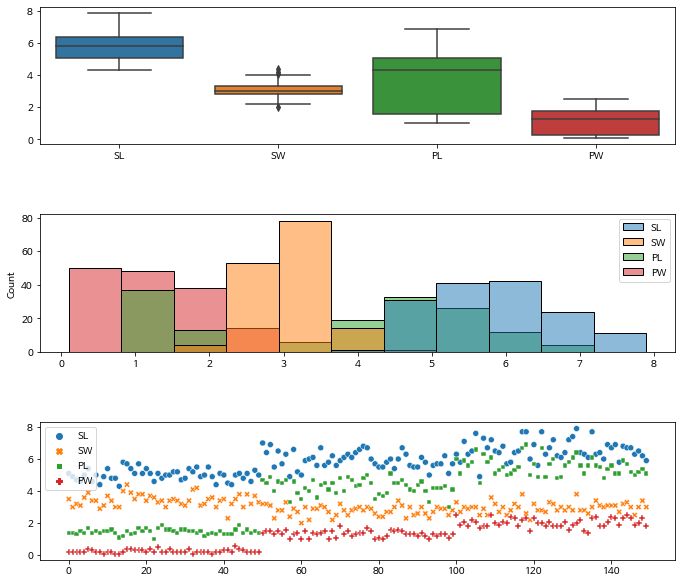

In [142]:
# 5. 각 컬럼에 대해서 boxplot, histogram, scatter 를 사용하여 데이터분포 확인
figure, axes = plt.subplots(3)

# 그래프 사이에 여백 확보
plt.tight_layout()
# 전체 Figure 크기를 10x9 인치로 설정
figure.set_size_inches(10, 9)

sns.boxplot(data=df_iris, ax=axes[0])
sns.histplot(data=df_iris, ax=axes[1])
sns.scatterplot(data=df_iris, ax=axes[2])

In [143]:
# 6. 평균, 분산, 사분위 값 구하기
df_iris.describe()
len(df_iris.columns)

5

In [147]:
# 7. 각 컬럼에서 랜덤하게 3개 이상의 결측치로 대체하기
for i in range(len(df_iris.columns)-1):
  for j in range(10):
    rand_index =np.random.randint(low=0, high=len(df_iris['SL']))
    df_iris.iloc[rand_index,i]=np.nan

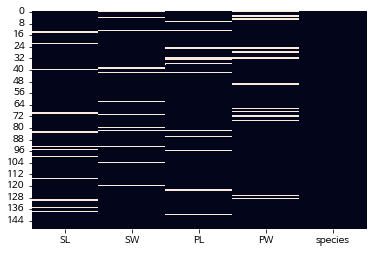

In [149]:
# 8. 결측치를 숫자정보와 시각화로 확인
df_iris.isnull().sum()
sns.heatmap(df_iris.isnull(),cbar=False)

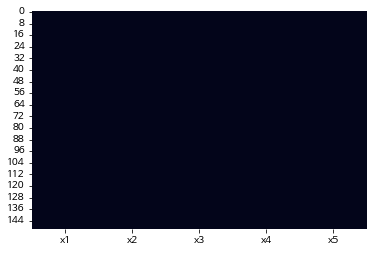

In [151]:
# 9. 결측치를 적절한 값으로 대체하기

from sklearn.impute import SimpleImputer
imp_mean= SimpleImputer(strategy='mean')
imp_fre = SimpleImputer(strategy='most_frequent')
# 평균 대체
df_iris = pd.DataFrame(imp_fre.fit_transform(df_iris),columns=df.columns)
sns.heatmap(df_iris.isnull(),cbar=False)

In [ ]:
sns

In [153]:
# 10. 이상치가 있는지 확인하고 처리하기.
# iqr 결측치 제거
def iqr_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [i for i, x in enumerate(data) if x < lower_bound or x > upper_bound]
    print('제거 리스트',outliers)
    data = data.drop(outliers)
    
    return data



In [160]:
df_iris.iloc[:,0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: x1, Length: 150, dtype: object

In [161]:
for i in range(len(df_iris.columns)-1):
  iqr_outliers(df_iris.iloc[:,i])

제거 리스트 []
제거 리스트 [15, 32, 33, 60]
제거 리스트 []
제거 리스트 []


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


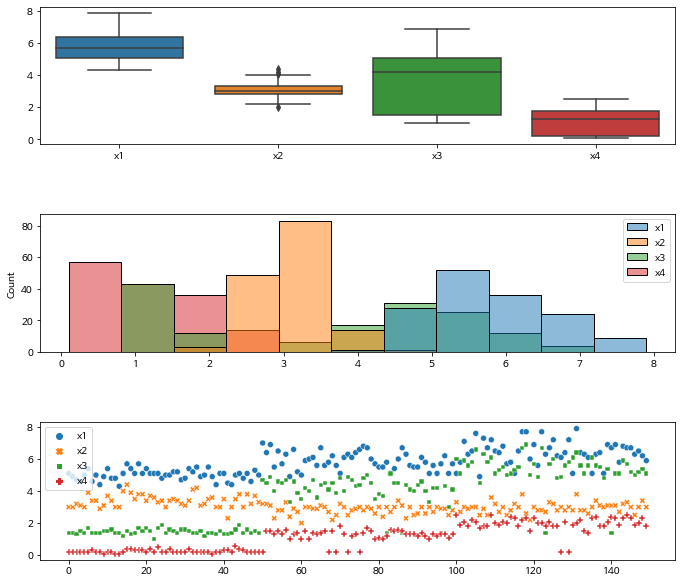

In [163]:

figure, axes = plt.subplots(3)

# 그래프 사이에 여백 확보
plt.tight_layout()
# 전체 Figure 크기를 10x9 인치로 설정
figure.set_size_inches(10, 9)

sns.boxplot(data=df_iris, ax=axes[0])
sns.histplot(data=df_iris, ax=axes[1])
sns.scatterplot(data=df_iris, ax=axes[2])